## Weather choise making using Decision Trees - CH.SC.U4CSE23240

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn

In [2]:
data = pd.read_csv("/content/weather_decision.csv")
print(data.shape)
data.head()

(99, 3)


,weather,activity,decision
0,sunny,errands,go out
1,rainy,movie,stay in
2,sunny,picnic,go out
3,rainy,drink,stay in
4,sunny,movie,go out


In [3]:
df = data.copy()
df["weather"] = df["weather"].map({"sunny":0, "rainy":1})
df["activity"] = df["activity"].map({
    "picnic":0, "drink":1, "errands":2, "movie":3
})
df["decision"] = df["decision"].map({"stay in":0, "go out":1})

In [4]:
x = df[['weather','activity']]
y = df['decision']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(79, 2)

(79,)

(20, 2)

(20,)

In [5]:
model = DecisionTreeClassifier(criterion='entropy',random_state=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('y_pred : ', y_pred)

y_pred :  [0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1]


In [6]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('conf_mat : ', conf_mat)
Acc = metrics.accuracy_score(y_test, y_pred)
print('Acc : ', Acc)
print("Acc in percentage : ", int(Acc*100),'%')

conf_mat :  [[ 6  0]
 [ 0 14]]
Acc :  1.0
Acc in percentage :  100 %


<Axes: xlabel='Predicted', ylabel='Actual'>

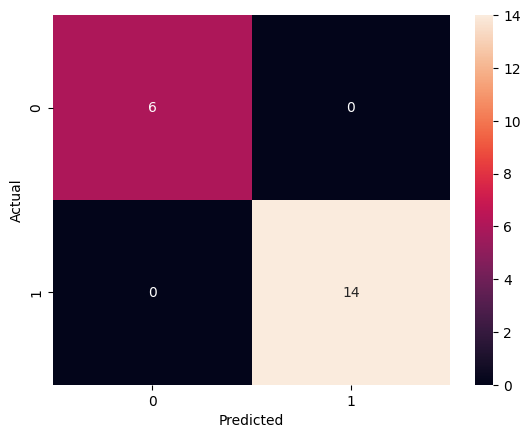

In [7]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)